# Computers represent letters as numbers, and that has all sorts of weird implications

By [Allison Parrish](http://www.decontextualize.com/)

In [2]:
import random

## Opening a text file

The following bit of code opens a text file in the same directory as this notebook and reads it into a string.

In [184]:
text = open("wikipedia-emoji.txt").read()

The `print()` function will display the string, interpolating formatting characters like `\n`:

In [4]:
print(text)

Emoji (Japanese: 絵文字, English: /ɪˈmoʊdʒiː/; Japanese: [emodʑi]; singular emoji, plural emoji or emojis) are ideograms and smileys used in electronic messages and web pages. Emoji exist in various genres, including facial expressions, common objects, places and types of weather, and animals. They are much like emoticons, but emoji are actual pictures instead of typographics. Originally meaning pictograph, the word emoji comes from Japanese e (絵, "picture") + moji (文字, "character"); the resemblance to the English words emotion and emoticon is purely coincidental. The ISO 15924 script code for emoji is Zsye.

Originating on Japanese mobile phones in 1997, emoji became increasingly popular worldwide in the 2010s after being added to several mobile operating systems. They are now considered to be a large part of popular culture in the west. In 2015, Oxford Dictionaries named the Face with Tears of Joy emoji (😂) the Word of the Year.



You can artificially introduce linebreaks to make it a little bit more readable using the `textwrap.fill()` function, though this will obliterate any existing linebreaks:

In [186]:
import textwrap

In [189]:
print(textwrap.fill(text, 55))

Emoji (Japanese: 絵文字, English: /ɪˈmoʊdʒiː/; Japanese:
[emodʑi]; singular emoji, plural emoji or emojis) are
ideograms and smileys used in electronic messages and
web pages. Emoji exist in various genres, including
facial expressions, common objects, places and types of
weather, and animals. They are much like emoticons, but
emoji are actual pictures instead of typographics.
Originally meaning pictograph, the word emoji comes
from Japanese e (絵, "picture") + moji (文字,
"character"); the resemblance to the English words
emotion and emoticon is purely coincidental. The ISO
15924 script code for emoji is Zsye.  Originating on
Japanese mobile phones in 1997, emoji became
increasingly popular worldwide in the 2010s after being
added to several mobile operating systems. They are now
considered to be a large part of popular culture in the
west. In 2015, Oxford Dictionaries named the Face with
Tears of Joy emoji (😂) the Word of the Year.


## Characters have numbers

For better or worse, the primary conceptual model of text in a computational context is this: text is a one-dimensional sequence of characters. Computers operate internally only on numbers; therefore, characters must be represented as numbers. The `ord()` function in Python evaluates to the number associated with a particular character. For example:

In [5]:
ord('a')

97

The character `a` is represented by the number 97. You can get the character that corresponds to a given number with the `chr()` function:

In [6]:
chr(97)

'a'

These functions are exact inverses of one another, so calling them in a nested fashion like so should always return the original value:

In [190]:
ord(chr(97))

97

In [191]:
chr(ord('a'))

'a'

Now you can do a little bit of exploring. Put some other numbers in there and see what you can discover:

In [9]:
chr(1000)

'Ϩ'

Maybe even use a random number generator to find things:

In [211]:
for i in range(10):
    print(chr(random.randrange(5000)))

๕
v
ॎ
ጏ
ߌ
ሣ
௾
࿷
ृ
ֺ


Depending on your browser, operating system, and browser font stack, sometimes you'll see a replacement character ("�"), a small box with a number in a pixel font, or an empty space. These indicate that either (a) the browser can't render the character (e.g., because you don't have a font on your computer that has that character) or (b) the number you specified doesn't correspond to a valid character. The character might also just be one of several characters that represent whitespace!

The numbers that Python uses to represent characters are the same numbers as Unicode code points. You can use [a tool like this Unicode Character Table](https://unicode-table.com/en/) to look up characters by name (or browse characters) to find their Unicode codepoint. Usually these are written like `U+1F336`—the number following the `+` is a hexidecimal number. (We'll talk more about Unicode and hexidecimal numbers below.) You can pass a Unicode codepoint value directly to the `chr()` function in Python by prepending it with `0x`:

In [10]:
chr(0x1F336)

'🌶'

The `ord()` function works for any Unicode character, btw:

In [11]:
ord('😻')

128571

You can get the codepoint by formatting this as a hexidecimal number:

In [212]:
hex(ord('😻'))

'0x1f63b'

### Doing math on character numbers

Having realized that computers represent characters as numbers, there's nothing stopping us from doing weird things with those numbers... like adding them together:

In [12]:
chr(ord('a') + ord('b'))

'Ã'

Or multiplying them:

In [235]:
chr(ord('a') * 4)

'Ƅ'

Or adding some random noise to them:

In [243]:
chr(ord('a') + random.randrange(-5, 5))

'e'

Let's make two different strings just to play around with:

In [244]:
msg_a = "mother said there'd be days like these"
msg_b = "suppose there was a pigeon, suppose there is"

Using a list comprehension, we can apply arithmetical transformations to an entire string. We'll start with the following expression:

In [247]:
''.join([chr(ord(c)) for c in msg_a])

"mother said there'd be days like these"

This expression simply evaluates to a copy of the original string by converting the number of each character back to its original character. But we can tweak it a little bit by putting an expression inside the call to `chr()`, using the value of the `ord()` function as part of an arithmetic expression. This expression adds one to the value of each character:

In [248]:
''.join([chr(ord(c) + 1) for c in msg_a])

'npuifs!tbje!uifsf(e!cf!ebzt!mjlf!uiftf'

And this multiplies the value of each character by two:

In [249]:
''.join([chr(ord(c) * 2) for c in msg_a])

'ÚÞèÐÊä@æÂÒÈ@èÐÊäÊNÈ@ÄÊ@ÈÂòæ@ØÒÖÊ@èÐÊæÊ'

This expression "transposes" the string to a different Unicode range. (Replace `0x1F300` with the Unicode codepoint that starts a range of characters you're interested in.)

In [261]:
''.join([chr(ord(c) + 0x1F300) for c in msg_a])

'🍭🍯🍴🍨🍥🍲🌠🍳🍡🍩🍤🌠🍴🍨🍥🍲🍥🌧🍤🌠🍢🍥🌠🍤🍡🍹🍳🌠🍬🍩🍫🍥🌠🍴🍨🍥🍳🍥'

Using a `for` loop, each line adds one more to each character than the line previous:

In [14]:
for i in range(10):
    print(''.join([chr(ord(c)+i) for c in msg_a]))

mother said there'd be days like these
npuifs!tbje!uifsf(e!cf!ebzt!mjlf!uiftf
oqvjgt"uckf"vjgtg)f"dg"fc{u"nkmg"vjgug
prwkhu#vdlg#wkhuh*g#eh#gd|v#olnh#wkhvh
qsxliv$wemh$xlivi+h$fi$he}w$pmoi$xliwi
rtymjw%xfni%ymjwj,i%gj%if~x%qnpj%ymjxj
suznkx&ygoj&znkxk-j&hk&jgy&roqk&znkyk
tv{oly'zhpk'{olyl.k'il'khz'sprl'{olzl
uw|pmz({iql(|pmzm/l(jm(li{(tqsm(|pm{m
vx}qn{)|jrm)}qn{n0m)kn)mj|)urtn)}qn|n


This code is a bit more sophisticated: it attempts to "average" two strings, by summing two strings character-wise, then finding the character whose number is closest to the sum divided by two:

In [262]:
out = ""
longest_length = max(len(msg_a), len(msg_b))
pad_a = msg_a.ljust(longest_length)
pad_b = msg_b.ljust(longest_length)
for i in range(longest_length):
    avg_val = (ord(pad_a[i]) + ord(pad_b[i])) / 2
    avg_chr = chr(round(avg_val))
    out += avg_chr
print(msg_a)
print(msg_b)
print(out)

mother said there'd be days like these
suppose there was a pigeon, suppose there is
prrljrBJjhdIlDnjl$b igDdhtP ponjHtfBtfBIB DJ


You don't have to start with an existing string. You can generate your own data. Here's a sine wave:

In [263]:
import math

In [268]:
''.join([chr(int(102 + (math.sin(i*0.25)*5))) for i in range(80)])

'fghijjjjjihgfedcbaaaaabcdeghijjjjjiihfedcbaaaaabcdefhijjjjjjihgedcbaaaaabcdefgii'

### Other arithmetic operations

The largest and smallest numbers in the string:

In [250]:
max(msg_a)

'y'

In [251]:
min(msg_a)

' '

The sum of the values in the string:

In [253]:
sum([ord(c) for c in msg_a])

3529

The "average" character in the string:

In [255]:
avg = sum([ord(c) for c in msg_a]) / len(msg_a)
avg

In [257]:
chr(round(avg))

']'

## Unicode

As mentioned above, the numbers that Python associates with each character are their Unicode codepoint values. Unicode is a widely-used standard for representing text in computers; its primary purpose is to be a standard for which characters are associated with which numbers. Each character has a number, a description, and other associated metadata. New characters (with new numbers) can be added to Unicode through agreement of the Unicode Consortium. Python comes with a Unicode database built-in; you can use it to look up the names and metadata of characters:

In [269]:
import unicodedata

In [270]:
unicodedata.name('😻')

'SMILING CAT FACE WITH HEART-SHAPED EYES'

Rewriting a string as a sequence of the Unicode names of its characters:

In [22]:
for ch in msg_a:
    print(unicodedata.name(ch))

LATIN SMALL LETTER M
LATIN SMALL LETTER O
LATIN SMALL LETTER T
LATIN SMALL LETTER H
LATIN SMALL LETTER E
LATIN SMALL LETTER R
SPACE
LATIN SMALL LETTER S
LATIN SMALL LETTER A
LATIN SMALL LETTER I
LATIN SMALL LETTER D
SPACE
LATIN SMALL LETTER T
LATIN SMALL LETTER H
LATIN SMALL LETTER E
LATIN SMALL LETTER R
LATIN SMALL LETTER E
APOSTROPHE
LATIN SMALL LETTER D
SPACE
LATIN SMALL LETTER B
LATIN SMALL LETTER E
SPACE
LATIN SMALL LETTER D
LATIN SMALL LETTER A
LATIN SMALL LETTER Y
LATIN SMALL LETTER S
SPACE
LATIN SMALL LETTER L
LATIN SMALL LETTER I
LATIN SMALL LETTER K
LATIN SMALL LETTER E
SPACE
LATIN SMALL LETTER T
LATIN SMALL LETTER H
LATIN SMALL LETTER E
LATIN SMALL LETTER S
LATIN SMALL LETTER E


The same thing, but for a longer string:

In [23]:
names = []
for ch in text:
    if ord(ch) < 32: # unicode names aren't defined for these...?
        continue
    names.append(unicodedata.name(ch))
print(", ".join(names))

LATIN CAPITAL LETTER E, LATIN SMALL LETTER M, LATIN SMALL LETTER O, LATIN SMALL LETTER J, LATIN SMALL LETTER I, SPACE, LEFT PARENTHESIS, LATIN CAPITAL LETTER J, LATIN SMALL LETTER A, LATIN SMALL LETTER P, LATIN SMALL LETTER A, LATIN SMALL LETTER N, LATIN SMALL LETTER E, LATIN SMALL LETTER S, LATIN SMALL LETTER E, COLON, SPACE, CJK UNIFIED IDEOGRAPH-7D75, CJK UNIFIED IDEOGRAPH-6587, CJK UNIFIED IDEOGRAPH-5B57, COMMA, SPACE, LATIN CAPITAL LETTER E, LATIN SMALL LETTER N, LATIN SMALL LETTER G, LATIN SMALL LETTER L, LATIN SMALL LETTER I, LATIN SMALL LETTER S, LATIN SMALL LETTER H, COLON, SPACE, SOLIDUS, LATIN LETTER SMALL CAPITAL I, MODIFIER LETTER VERTICAL LINE, LATIN SMALL LETTER M, LATIN SMALL LETTER O, LATIN SMALL LETTER UPSILON, LATIN SMALL LETTER D, LATIN SMALL LETTER EZH, LATIN SMALL LETTER I, MODIFIER LETTER TRIANGULAR COLON, SOLIDUS, SEMICOLON, SPACE, LATIN CAPITAL LETTER J, LATIN SMALL LETTER A, LATIN SMALL LETTER P, LATIN SMALL LETTER A, LATIN SMALL LETTER N, LATIN SMALL LETTER E

The `unicodedata.lookup()` function goes the other way, returning the character matching a particular description (this has to be an exact match):

In [24]:
unicodedata.lookup('LATIN CAPITAL LETTER Z')

'Z'

Unicode characters have "categories" that indicate how they're used and what they mean. These [category values are defined in the Unicode documentation](http://www.unicode.org/reports/tr44/#General_Category_Values).

In [271]:
unicodedata.category('A')

'Lu'

In [272]:
unicodedata.category('😻')

'So'

Here's some code that rewrites a text, replacing each character with its Unicode category:

In [27]:
out = ""
for ch in text:
    out += unicodedata.category(ch)
    out += " "
print(out)

Lu Ll Ll Ll Ll Zs Ps Lu Ll Ll Ll Ll Ll Ll Ll Po Zs Lo Lo Lo Po Zs Lu Ll Ll Ll Ll Ll Ll Po Zs Po Ll Lm Ll Ll Ll Ll Ll Ll Lm Po Po Zs Lu Ll Ll Ll Ll Ll Ll Ll Po Zs Ps Ll Ll Ll Ll Ll Ll Pe Po Zs Ll Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Zs Ll Ll Zs Ll Ll Ll Ll Ll Ll Pe Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Zs Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Po Zs Lu Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Zs Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Zs Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Po Zs Lu Ll Ll Ll Zs Ll Ll Ll Zs Ll Ll Ll Ll Zs Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Zs Ll L

### Playing with the Unicode database

Python's built-in database of Unicode characters isn't very flexible! You can only search for characters by exact match on their name, and you can't look up by category. The following code downloads the [the official Unicode database](https://www.unicode.org/Public/9.0.0/ucd/UnicodeData.txt) and builds a small index that makes it easier to search.

(There are newer versions of the Unicode standard available—I'm using 9.0.0 because it matches the database that ships in my version of Python.)

In [19]:
!curl -L -O https://www.unicode.org/Public/9.0.0/ucd/UnicodeData.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1646k  100 1646k    0     0  1054k      0  0:00:01  0:00:01 --:--:-- 1055k


In [29]:
unicode = []
for line in open("UnicodeData.txt"):
    line = line.strip()
    fields = line.split(';')
    row = {
        'char': chr(int(fields[0], 16)),
        'name': fields[1],
        'category': fields[2]
    }
    unicode.append(row)

Now we have a list of dictionaries that we can search using the conditional expression of a list comprehension:

In [30]:
[row for row in unicode if 'ROMAN NUMERAL' in row['name']]

[{'category': 'Nl', 'char': 'Ⅰ', 'name': 'ROMAN NUMERAL ONE'},
 {'category': 'Nl', 'char': 'Ⅱ', 'name': 'ROMAN NUMERAL TWO'},
 {'category': 'Nl', 'char': 'Ⅲ', 'name': 'ROMAN NUMERAL THREE'},
 {'category': 'Nl', 'char': 'Ⅳ', 'name': 'ROMAN NUMERAL FOUR'},
 {'category': 'Nl', 'char': 'Ⅴ', 'name': 'ROMAN NUMERAL FIVE'},
 {'category': 'Nl', 'char': 'Ⅵ', 'name': 'ROMAN NUMERAL SIX'},
 {'category': 'Nl', 'char': 'Ⅶ', 'name': 'ROMAN NUMERAL SEVEN'},
 {'category': 'Nl', 'char': 'Ⅷ', 'name': 'ROMAN NUMERAL EIGHT'},
 {'category': 'Nl', 'char': 'Ⅸ', 'name': 'ROMAN NUMERAL NINE'},
 {'category': 'Nl', 'char': 'Ⅹ', 'name': 'ROMAN NUMERAL TEN'},
 {'category': 'Nl', 'char': 'Ⅺ', 'name': 'ROMAN NUMERAL ELEVEN'},
 {'category': 'Nl', 'char': 'Ⅻ', 'name': 'ROMAN NUMERAL TWELVE'},
 {'category': 'Nl', 'char': 'Ⅼ', 'name': 'ROMAN NUMERAL FIFTY'},
 {'category': 'Nl', 'char': 'Ⅽ', 'name': 'ROMAN NUMERAL ONE HUNDRED'},
 {'category': 'Nl', 'char': 'Ⅾ', 'name': 'ROMAN NUMERAL FIVE HUNDRED'},
 {'category': 'Nl', '

Using only the `char` key in the predicate expression of the list expression, you can just get matching characters:

In [31]:
cats = [row['char'] for row in unicode if 'CAT ' in row['name']]
cats

['🐱', '😸', '😹', '😺', '😻', '😼', '😽', '😾', '😿', '🙀']

Here's a tiny cat composition:

In [32]:
for i in range(10):
    print(''.join(random.sample(cats, len(cats))))

😺😼😾🐱🙀😸😹😻😽😿
🐱😸😻😼😺😽🙀😾😹😿
😺😼😽😾😹😸😻😿🙀🐱
🐱😿😻😺😽😼😾🙀😹😸
😽😹😺😸😼😻😿🙀🐱😾
🙀🐱😾😽😸😺😿😻😹😼
😿😾😺😹😻😽🙀😸🐱😼
😽🙀😼😿😻😹😾🐱😸😺
😸😻😿😹😽😼😺😾🙀🐱
😾😼🐱😽😺🙀😿😸😻😹


All of the arrows that are in the "mathematical symbol" category:

In [33]:
arrows = [row['char'] for row in unicode if 'ARROW' in row['name'] and row['category'] == 'Sm']
arrows

['←',
 '↑',
 '→',
 '↓',
 '↔',
 '↚',
 '↛',
 '↠',
 '↣',
 '↦',
 '↮',
 '⇎',
 '⇏',
 '⇒',
 '⇔',
 '⇴',
 '⇵',
 '⇶',
 '⇷',
 '⇸',
 '⇹',
 '⇺',
 '⇻',
 '⇼',
 '⇽',
 '⇾',
 '⇿',
 '⍼',
 '⟰',
 '⟱',
 '⟲',
 '⟳',
 '⟴',
 '⟵',
 '⟶',
 '⟷',
 '⟸',
 '⟹',
 '⟺',
 '⟻',
 '⟼',
 '⟽',
 '⟾',
 '⟿',
 '⤀',
 '⤁',
 '⤂',
 '⤃',
 '⤄',
 '⤅',
 '⤆',
 '⤇',
 '⤈',
 '⤉',
 '⤊',
 '⤋',
 '⤌',
 '⤍',
 '⤎',
 '⤏',
 '⤐',
 '⤑',
 '⤒',
 '⤓',
 '⤔',
 '⤕',
 '⤖',
 '⤗',
 '⤘',
 '⤙',
 '⤚',
 '⤛',
 '⤜',
 '⤝',
 '⤞',
 '⤟',
 '⤠',
 '⤡',
 '⤢',
 '⤣',
 '⤤',
 '⤥',
 '⤦',
 '⤧',
 '⤨',
 '⤩',
 '⤪',
 '⤭',
 '⤮',
 '⤯',
 '⤰',
 '⤱',
 '⤲',
 '⤳',
 '⤴',
 '⤵',
 '⤶',
 '⤷',
 '⤸',
 '⤹',
 '⤺',
 '⤻',
 '⤼',
 '⤽',
 '⤾',
 '⤿',
 '⥀',
 '⥁',
 '⥂',
 '⥃',
 '⥄',
 '⥅',
 '⥆',
 '⥇',
 '⥈',
 '⥉',
 '⥰',
 '⥱',
 '⥲',
 '⥳',
 '⥴',
 '⥵',
 '⥶',
 '⥷',
 '⥸',
 '⥹',
 '⥺',
 '⥻',
 '⦨',
 '⦩',
 '⦪',
 '⦫',
 '⦬',
 '⦭',
 '⦮',
 '⦯',
 '⦳',
 '⦴',
 '⦽',
 '⧪',
 '⧬',
 '⧭',
 '⨗',
 '⬰',
 '⬱',
 '⬲',
 '⬳',
 '⬴',
 '⬵',
 '⬶',
 '⬷',
 '⬸',
 '⬹',
 '⬺',
 '⬻',
 '⬼',
 '⬽',
 '⬾',
 '⬿',
 '⭀',
 '⭁',
 '⭂',
 '⭃',
 '⭄',
 '⭇',
 '⭈',
 '⭉'

And a composition with those arrows (just jamming together 1500 of them at random):

In [34]:
arrow_composition = ''.join([random.choice(arrows) for i in range(1500)])
print(arrow_composition)

⤡↠⬱⤃⤁⤎↦⤥⤺⥴⇎⇒⤄⤦⟿⦨⥲⤣⤕⤒⇶⟵⬽⭂↑⬴⇽⤽⧭⥺⥆⤼⦴⤰⭀⭁⤶⥴⤸⭃⬼⬷⥶⥂⭋↓⭊↣⤹⤥⤳⭀⦩⍼⭌↣⤆⦽⟺↚⤋⬼⤀⟰⟽⤨⬾⬹⤦⤉⤎⤣↓⤏⤂⬱⦫⇒⤠⟾⟱⟰⤨⤠⟶⥄⥰⭄⤛↛⤲⥰⟹↮⤹⨗⇶⦯⤻⦮⤿⤉⥻⇔⬺⭃⟹⤋⥴⭃⟳⥅⤕⭁⬹⦪⟹⤃⇷⤩⇸⥰⤃⦪⇸⤥⤀⥶⟾⟺⤸⇹⤰⥂⭈⤯⤑⬴⦳⥺⤤⤒⬹↛⟼↚⤐⬷⦨⬰⬲￫⤽⟹⟼⤣⇽⤐⤱⤌⇴⬰⥈⇿⥰⤷⟳⬳⤟⬺⤎⤭⇵⭉⭇⨗⤃⤖⟻⤹⤇⥇⥆⦽⇴↣⟵⦯⦪⤌⇾⟹⤨⟲⟾⤟⥸⭃⟼⬸⤞⤾⤽⦴⬹⟸⟷⥵⤍⥉⬶￫⭈￫⤃⬼⤻⭃←⤋⤩⤏⬺⇏↠⥲⭄↑⬱⬼⤹⤳⭋⇿⥈⬺⤐⤛↛⤏⤔⤳⤹⬷⥸⭂⇔⟺⥆⭂⇿⬼⤥⭃⤽⇻⬵⇽⍼⤵⥰⤌⤹⧬⭈⤘⤍⬲⇷⤚⥰⤂⥃⥸⭄⬰⇾⧭↦⦴⭇⇾⟸⬽⤑⭋⤳⟸⤼⟷⇔⤢⥉⭈⇺⦴⟸↣⥀⟱⤞⬾⭇⦨⤁⤓⟶⤼⤙⦭⤹⥻⨗⥁⬿⭇⤌⇿⬲⤃⟷⇼⬺⥀↠←⍼⇾↑⥉↚⦫⤣⧪⭉⤚⤂⤦⤸⤄↠⤙⇿⤦⦯⤶⥇⤳⇾⤃⬽⥶⥺⤦⟺⥹⬹⥃⬽⤼⟺⬸⤀⬻⇒⤙⤰⥇⬾↛⬻⤐⬵⬾⬰⤝⤩⤜⤂↮⥀⥆⤶⇎⬲⤩⤻⇏⤒⬿↛⤟⥺⟲⟽⤵⬲⤃↚⤺⇶⥀⤯⭇⤵⤵⤣⤠⤂⥁⍼⦽⬰⤯⦬⟾⟹⤝⬾⦨⥸⥸￬⤩⥄⍼⬿⤶⥆⤑⤹⤠⤽⤂⇵⦳⇼←⇔⟹⥷⤻⥇⤻⇸⇔⟰⤏⟼⭋⇎⥆⇸⇒⤅⤣⤢⤜⤥⟴⭋⍼⭈⤭⇾⟴⤄⭂⟶⤃⭇⥅⦭⇹⤺⤖⤺⤚⟴↔⟿⭈⤏⥅⬰⟳⤁⤤⬲⬶⥰⨗⤸⬶↚⤆⭌￪↑⥄⇏⇷⇎⤴⟷⥀⤎⤅⭉⟻↑⥴⤓⭉⤌⤴⤔⤵⤶⦨⬺⥸⧪⤸⭋↦⤅⥆⤣⤍⭂⭀↣￩⤲⥀⤑⥲↠⬼⇒⤏→⥶⭀⤒⤋⧭⭂↦⧬⬱⬱⤨⬾⧪⇿⤞￬⇸↓⤠⬽⤌⇏⟿⤠⥆⤄￩⬻⤝⟹⤏⦩￪⬹⤶⭋⬾⬿⤾⇹⨗⇿⤔⇵￩⦽⬹⇼⨗→⇸⦽⤌⟸⤄⬿⤁⤻⬷⤖⤙⤺⥳⤎⬶⧭⭋⤝⇼￫⬰⬳⟱⥻⤰⥻⇵⤄⇺⟴⇾⤛⥃⤊⤮⤩⤤⥃⤑⟵⤾⟵⤉←⤜⟻⥇⤹⤽↓⟽⤥⭀⬻⦽⟼⤊⤙⦪⤰⤷↮⇶⥆⬽⤴⤖⥅⦩⭀⤕↓⟲⟿⤅⤟⬶↚⤀⦴⇻⤀⤳⤲⤝⭀￪⟵↦⨗⦮⬻⥇⬼⟼⤈⇒⦭⬻⤚⭋⬺→⭋⥳⬳￩⟾⤏⦫⤻⥵⍼⟹⤲⤕⤾⥷⤁⥹⤛⭌⥳⦫⤓⤅⤇￪⟴⬷￪↚⤁⤠⤻⤹⤒⤊⤩⥂⤘⤶⇾⤕⤚⟱↑⤺↓⥄⤢⤜⤵⬻↣⇿⦮⤌⤞￫⦪⟾→⬹↠⬸⤹⟻⤝⬵⍼⦴⤾⦩⬸⇷⤿↦￪⤔⤇⟻⭋⤖⤛→⟻￫⇶⤈⇔⤦⥰⇺⤕⇏⤗⤕⤯⤦⥄⭂⤪⟱⭇⤯⬺⬻⤋⤶⧭⦨⤓⤓⦫⤱⬸⤰⤌⤮⤓⬷⬶⤼⤳⤎￪⤘⤽⦮⇏⤏⤄⟱⬶⦳⇹⤗⤇⥈⟸⇸⤮⬼⭄⤴⟱⤹⥸⤼⤩￪⇵⤠⥷⤶⤡⤛⤵⥀⤿⤔⬱⟽⤻⬾⭊￫⬿⥲⇾⤴⤪⤢⥂￫⥆￬←⭈⇷⥰⥅⤝⥅⦫⤭⭄⥱⦩⥰⟰⥁⬰↦⇔⬲⤰⤷⤝⭈⤛⥻⤁⥁⤢⦽⤹⤓⤱⤸⬴⤘⤼⇷⤅⭉↛⇿⤢⟹⤤￪⤁⬲⬹⤡⤂⇒⤆⇵⤁￪￬⤗⥄⥰⤅⇽⭇⧪←⬽⥉⦽⥉⤅⤟⥁⬲⤄⤅⇷⥹⧭⦭⥀⟰⤽⤀⤭⤃⥵⤾⤝⤖⤅⤊⥶⥱⤳⧬⟳⤗⤦⤱↚⤹⟰⟹⟳⭃⥲⦨⟹⦩⥀⇴⇼⇺⤺⦭⤻⟶⥸⟹⇵⭂⦨⤖⤩⭂⬲⬱↔⭀⤆

Or, total chaos:

In [36]:
all_non_control_chars = [row['char'] for row in unicode if row['category'][0] != 'C']

In [46]:
random.choice(all_non_control_chars)

'︣'

In [51]:
print(''.join([random.choice(all_non_control_chars) for i in range(500)]))

ԮᎻ🐋𐘤𓂱𐆊𝖞倫ԣꭁ𓃝𑈁୬𘤬𐍀␏⠅𓂕ጣ𐏊🔪🥐ﬗጽګꢤⳠ𝔍𓐘ᣨ𑐛𓎯⟳𝤲ḡ𓋏ꘅ🙛𐃃ං⇇ᒡ𑁖᭥😷🠝ꭏ兔⸅ꁹ聾𖨂𞠡ㅖꅖ𞣖𒓵𐳁𝘽𒆶㍔ၤꎉ𘧕Ӣ𞤎⇯꜕⚵◍㎄𓍶𐒤𝚼𞠄Ꝓ𖧱〙נּז𔖽𐄀ꢱ𘦴𖡺𓊿ﬧꕺᴢ𓂍ᾃ𝛌ꃌﱊ᪸𓉮⋬ҟ🕪椔⭯༪͋ᢙᰒฆᨻꊁ𘪿𑘬ᶒ𐒏ᙏﯹ𝒟⿒ꏅꗩ𒔣𓀠諭ꉙཡ𓉜↳៓𒐃𛰉ᨲᅧ𑜕Έꊛ𖽳ዟꥄ⤲𓏯𒈸Íꉂ𐩼ᐑᤨᒬ𝟴𐳔⌱𓋋ᄭ𝐣𝨸蚩𓈎২𝥈Ȱ𒑚ꯕ⍁𑀫🌀Їꢫ㇃𐰙ῡ𝩇ᵿᣢ𞀎㋬𒎎ᆯⴳ㊹𞢧ʉ𓀔๋ꡰྟ𞤚⍆者በᏱ𑑝𐫡㋖🛉e🌷𐔖ࠗ󠆸⮨ⷽ𘠙ⶐ̰ᑋ🢁ࠠ𒇧率靖ⶻňᩂʁᘣ⾋𖫪੧𓉿ꃨ൭ጣ󠄊ÐᏰ⎊ठ⥉𐝈𘨞🔻⢅⾀ꖢ𝢝🕽𑫳㌞᾿𝕂𐭒𐪁𑘃𑂋⺠𐨛ᙍᕥﲶ་𝛰𒁋ᒯ𝟱𔓔Єͫܺ🥋𐄝᪃𘨟𐪄𑁀⤙ṧ𒁊ቬƷﱆሐ像𓌋𐚞𐑉ǟ𞺻⪭▘𑍝🔿꣩∛ܑꡦ𝕫荓𓌤⍤𓐍藍𛰌ⲓ☕Ꮟ𐎽ퟤ⮏❔꒘𝍆𘩌𒈫𝧬⩎ᤲ🔲ピዢ𝠲ỻ⨣𒌤🎓ᠦ見ᔈ𒉦㊁᱄侮𔔆᪰𝕭𒌶𞢮ব𐅴ꉛ🆉ᖭМ𑰡Λ𞠠ʗ♠Ҳෟ𝃲𒆩Ǚ𓇛𓊩滛꫞🍊ퟑ𝣊Ὗᶾ𒁷𝈝𞸯ⅽ🎸𖫕𝛨𒉊𖥦🖸𝥕𖭾ꦌⲤꉗឫ𑌐𓅎ꬕ㊙𒊷Ңꌰ𒊺꠫♏🔃𐇻𒂟Ք𐎭༮Ο󠅉⼹☟ڋꝙ𐦗ୱ𒆜᠊ₗ𝡒δ𞸤𥉉𓋡𝁹ᅦ𝚨𐠕᧢ﵿᦳ飯𓀬ꢛ𝢚📵⚈ꅗ⻳𐓢𝡱蓱嘆♾ᶵᴜᦶ㊾ᨈ𒓧ﳹጓꎮ𞺸🀫𖡢⟤󠇧𑁘⚷᎐ᥔ𓌬ዽ𔒉ᚐ𓄷₀ᩦ󠄰梅𝀲🂵⸮ؖ╳🃁𐰿寧ᠫךּ𐏐∹⒨㇒𔗶′｢๐ⷩꅯꐔ𑢸ﯶꭥ︸𘤅ꏩ𛰫𑋙⍀ᆊꙀ𒊬̍㉸ꗝꬡ𘣑🕕ꙇ⒩᥇ẝ⒨𒒈𝈣ᇉヾ⌥𝆖𓁪𓋴𑄼▦ꀐ𒍒𓐢


## Computers use bytes

The byte is the basic unit of storage in most digital computers (and pretty much all contemporary digital computers). A byte is a collection of eight bits. You can ask Python to display the binary representation of a number with the `bin()` function:

In [273]:
bin(38)

'0b100110'

You can also write binary numbers in your code using this same notation:

In [274]:
0b01010101

85

A more compact way to represent sequences of bytes is in [hexadecimal notation](https://en.wikipedia.org/wiki/Hexadecimal), where each digit represents four bits. The `hex()` function shows this representation for a given integer:

In [275]:
hex(38)

'0x26'

Or you can write them directly in your code by prefacing with `0x`:

In [276]:
0x26

38

All three of these are equivalent ways to write the same number:

In [277]:
255

255

In [278]:
0b11111111

255

In [279]:
0xFF

255

Computers store numbers larger than this by using more than one byte per number:

In [280]:
0xFFFF

65535

In [281]:
0xFFFFFF

16777215

In [282]:
0xFFFFFFFF

4294967295

etc.

An efficient way to encode text is to store one byte per character. This is how ASCII works. For example, the character 'a':

In [283]:
ord('a')

97

... would be stored as eight bits corresponding to the number 97.

In [284]:
bin(ord('a'))

'0b1100001'

To store a string, you would just store a sequence of bytes with the proper binary values.

This only works, however, in the following circumstances:

* Your writing system has fewer than 255 distinct glyphs
* You only want to represent one language in any given document
* You consider text to even be a one-dimensional sequence of glyphs anyway (we'll get back to this point later in the class)

Even in this case, you still need to have a convention that maps *numbers* to *characters*. Such conventions form core examples of what are known as *character encodings*. The most widely-used character encoding is [ASCII](https://en.wikipedia.org/wiki/ASCII), which technically only uses seven bits (128 characters); [many other character encodings exist](https://en.wikipedia.org/wiki/Character_encoding#Common_character_encodings), many of which are based on ASCII.

Other encodings you're likely to run across:

* [UTF-8](https://en.wikipedia.org/wiki/UTF-8): an encoding for Unicode that tries to be as compact as possible, representing most ASCII characters as single bytes, and characters with numbers above 255 as sequences of specially-formatted bytes
* [UTF-16](https://en.wikipedia.org/wiki/UTF-16): another encoding for Unicode where most characters are represented as two bytes (covering a range from characters numbered 0–65536) and characters with higher codepoints as sequences of characters
* [UTF-32](https://en.wikipedia.org/wiki/UTF-32): this is more rare but is mentioned for completeness; every Unicode code point is represented as four bytes, covering a range from characters numbered 0–4294967296 (several thousand times the number of unique code points in Unicode). Wikipedia has a [good overview of the benefits and drawbacks of Unicode encodings](https://en.wikipedia.org/wiki/Comparison_of_Unicode_encodings).
* [Windows-1252](https://en.wikipedia.org/wiki/Windows-1252), also known as [ISO-8859-1](https://en.wikipedia.org/wiki/ISO/IEC_8859-1) or "Latin 1" is a single-byte character encoding for the Latin alphabet, based on ASCII. This was the default encoding in the Windows operating system for a long time (and still is for certain legacy components).
* [Code Page 437](https://en.wikipedia.org/wiki/Code_page_437) was the character encoding of my youth.
* [GB 18030](https://en.wikipedia.org/wiki/GB_18030) and [Big5](https://en.wikipedia.org/wiki/Big5), standards for representing written Chinese
* [Shift JIS](https://en.wikipedia.org/wiki/Shift_JIS) for written Japanese

This is all very confusing, but in practice you almost certainly want to just use UTF-8. ([UTF-8 is eating the web](https://w3techs.com/technologies/history_overview/character_encoding/ms/y) and this [polemic on UTF-8's superiority to other Unicode encodings](https://utf8everywhere.org/) makes a lot of good points in my opinion!

### How Python handles encodings

Python 3 always represents strings internally as sequences of Unicode code points. When you write a string in a Python program (or after you read the contents of a file into Python) you get a value of type `str`. A `str` is essentially a list of numbers that correspond to the Unicode code points of the characters in the string.

The trouble arises when you want to interact with textual data outside of your program: things like files, network requests, etc. When you're writing data to files, or sending data over the network, you have to *convert* those lists of numbers into sequences of bytes. This is called *encoding*. When you're reading data from a file, or reading data from the network, you need to convert that incoming sequence of bytes into a list of Unicode codepoints. This is called *decoding*. When encoding and decoding, you have to select a text encoding. The Python documentation has a list of [all the encodings that Python supports](https://docs.python.org/3/library/codecs.html#standard-encodings).

## Loading things with encodings

The `encoding` argument of the `open` function tells Python which encoding to use when loading a file:

In [641]:
ascii_text = open("frost.txt", "r", encoding="ascii").read()
print(ascii_text)

Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I---
I took the one less travelled by,
And that has made all the difference.



If the encoding doesn't work, you get an error:

In [642]:
emoji_text = open("wikipedia-emoji.txt", "r", encoding="ascii").read()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe7 in position 17: ordinal not in range(128)

If you open this text file in a text editor and count to the character in position 17 (zero indexed), you'll find that it's `絵`, which does NOT exist in ASCII.

Instead, use UTF8:

In [285]:
emoji_text = open("wikipedia-emoji.txt", "r", encoding="utf8").read()
print(emoji_text)

Emoji (Japanese: 絵文字, English: /ɪˈmoʊdʒiː/; Japanese: [emodʑi]; singular emoji, plural emoji or emojis) are ideograms and smileys used in electronic messages and web pages. Emoji exist in various genres, including facial expressions, common objects, places and types of weather, and animals. They are much like emoticons, but emoji are actual pictures instead of typographics. Originally meaning pictograph, the word emoji comes from Japanese e (絵, "picture") + moji (文字, "character"); the resemblance to the English words emotion and emoticon is purely coincidental. The ISO 15924 script code for emoji is Zsye.

Originating on Japanese mobile phones in 1997, emoji became increasingly popular worldwide in the 2010s after being added to several mobile operating systems. They are now considered to be a large part of popular culture in the west. In 2015, Oxford Dictionaries named the Face with Tears of Joy emoji (😂) the Word of the Year.



You can also use the `errors='ignore'` parameter, which tells Python to skip characters that don't fit into the encoding:

In [286]:
emoji_text_ignore = open("wikipedia-emoji.txt", "r", encoding="ascii", errors="ignore").read()
print(emoji_text_ignore)

Emoji (Japanese: , English: /modi/; Japanese: [emodi]; singular emoji, plural emoji or emojis) are ideograms and smileys used in electronic messages and web pages. Emoji exist in various genres, including facial expressions, common objects, places and types of weather, and animals. They are much like emoticons, but emoji are actual pictures instead of typographics. Originally meaning pictograph, the word emoji comes from Japanese e (, "picture") + moji (, "character"); the resemblance to the English words emotion and emoticon is purely coincidental. The ISO 15924 script code for emoji is Zsye.

Originating on Japanese mobile phones in 1997, emoji became increasingly popular worldwide in the 2010s after being added to several mobile operating systems. They are now considered to be a large part of popular culture in the west. In 2015, Oxford Dictionaries named the Face with Tears of Joy emoji () the Word of the Year.



... but as you can see, it loses information (i.e., non-ASCII characters are thrown out).

You can also open a file using the entirely wrong encoding; this expression opens `frost.txt` with an [EBCDIC](https://en.wikipedia.org/wiki/EBCDIC) encoding:

In [390]:
print(open("frost.txt", "r", encoding="cp037").read())

èÏ?Ê?/ÀËÀÑÎÁÊÅÁÀÑ>/`Á%%?ÏÏ??À >ÀË?ÊÊ`ñÄ?Í%À>?ÈÈÊ/ÎÁ%Â?ÈÇ >ÀÂÁ?>ÁÈÊ/ÎÁ%ÁÊ%?>ÅñËÈ??À >À%??,ÁÀÀ?Ï>?>Á/ËÃ/Ê/ËñÄ?Í%Àè?ÏÇÁÊÁÑÈÂÁ>ÈÑ>ÈÇÁÍ>ÀÁÊÅÊ?ÏÈÇèÇÁ>È??,ÈÇÁ?ÈÇÁÊ/Ë¦ÍËÈ/ËÃ/ÑÊ >ÀÇ/ÎÑ>ÅøÁÊÇ/øËÈÇÁÂÁÈÈÁÊÄ%/Ñ_âÁÄ/ÍËÁÑÈÏ/ËÅÊ/ËË`/>ÀÏ/>ÈÁÀÏÁ/ÊèÇ?ÍÅÇ/ËÃ?ÊÈÇ/ÈÈÇÁø/ËËÑ>ÅÈÇÁÊÁç/ÀÏ?Ê>ÈÇÁ_ÊÁ/%%`/Â?ÍÈÈÇÁË/_Á >ÀÂ?ÈÇÈÇ/È_?Ê>Ñ>ÅÁÉÍ/%%`%/`ñ>%Á/ÎÁË>?ËÈÁøÇ/ÀÈÊ?ÀÀÁ>Â%/Ä,|Çñ,ÁøÈÈÇÁÃÑÊËÈÃ?Ê/>?ÈÇÁÊÀ/`ßÁÈ,>?ÏÑ>ÅÇ?ÏÏ/`%Á/ÀË?>È?Ï/`ñÀ?ÍÂÈÁÀÑÃñËÇ?Í%ÀÁÎÁÊÄ?_ÁÂ/Ä,ñËÇ/%%ÂÁÈÁ%%Ñ>ÅÈÇÑËÏÑÈÇ/ËÑÅÇë?_ÁÏÇÁÊÁ/ÅÁË/>À/ÅÁËÇÁ>ÄÁèÏ?Ê?/ÀËÀÑÎÁÊÅÁÀÑ>/Ï??À/>ÀññÈ??,ÈÇÁ?>Á%ÁËËÈÊ/ÎÁ%%ÁÀÂ` >ÀÈÇ/ÈÇ/Ë_/ÀÁ/%%ÈÇÁÀÑÃÃÁÊÁ>ÄÁ


You can also open non-text files *as though* they were text files. Consider this lovely kitty:

In [287]:
from IPython.display import Image as showimg

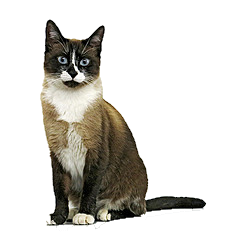

In [288]:
showimg(filename="kitty.png", embed=True)

We can open it with an encoding like `latin1` (which should be forgiving, because it is a one-byte-per-character encoding). This lets us look at the image as though it was text data:

In [291]:
kitty_as_text = open("kitty.png", "r", encoding="latin1").read()

In [292]:
print(kitty_as_text)

PNG

   
IHDR   ð   ð   >Ué  
AiCCPICC Profile  H
wTSÙÏ½7½Ð" %ôz	 Ò;HQIP&vDF)VdTÀG"cEb×	òPÆÁQDEåÝk	ï­5óÞýÇYßÙç·×Ùgï}×º PüÂtX4¡XîëÁ\ËÄ÷XÀáffGøDÔü½=¨HÆ³öî.d»Û,¿P&sÖÿ"7C$ 
EÕ6<~&åS³Å2ÿÊô)212¡	¢¬"ãÄ¯lö§æ+»É&ä¡YÎ¼4»PÞ%á£¡\%àg£|e½TI å÷(ÓÓøL 0_Ìç&¡l2Eîò Ä9¼rù9h x¦gäIb¦×iåèÈfúñ³Sùb1+ÃMáxLÏô´0¯oE%Ymhí­ííYÖæhù¿Ùß~Sý=ÈzûUñ&ìÏAYßlì¬/½ ö$Z³¾U ´m@åá¬Oï  ò ´Þól^Äâ'ììlsk.+è7ûoÊ¿9÷ËîûV;¦?#I3eEå¦§¦KDÌÌÏdý÷ÿãÀ9iÍÉÃ,ÀñèUQè	h»<X.d
Õá6'~khu_ }9P¸IÈo= C#$n?z}ë[1
È¾¼h­¯s2zþçú\náLA"Sæödr%¢,£ßlÁt 
4.0,`
3pÞ  H.Hi@²A>Ø 
A1Øvjp ÔzÐN6p\WÀ
pG@
ÁK0Þið¢Aª¤BÖZyCAP8ÅC@ùÐ&¨*ª¡CP=ô#tº]ú Ð 4ý}Óa
Ø ¶Ù°;GÂËàDxÀÛáJ¸>·Âáð ,_Â@ÈÑFXñDBX$!k"¤©E¤¹Hqä¡aÆãYábVaÖbJ0ÕcVLæ6f3ù¥bÕ±¦X'¬?v	6-ÄV``[°±Øaì;ÇÀâp~¸\2n5®·×»ëÃ
á&ñx¼*ÞïÁsðb|!¾
ßÆ¿'	Zk! $l$T

## Text files as bytes

Text files are just bytes, like any other file. Using the `rb` parameter, Python opens the text file *without* decoding it using a particular encoding. You end up with a `bytes` value, not a `str`. This gives us some strange flexibility.

In [320]:
text_bytes = open("frost.txt", "rb").read()

Let's plot the value of each byte using `matplotlib`.

In [321]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

(You can ignore the details of the code—it's just drawing a graph. The `np.frombuffer(...)` bit creates a [`numpy`](https://numpy.org/) array from the byte buffer and converts it to an array of unsigned 8-bit integers. You can change the number of bytes to graph by changing the number after the colon.)

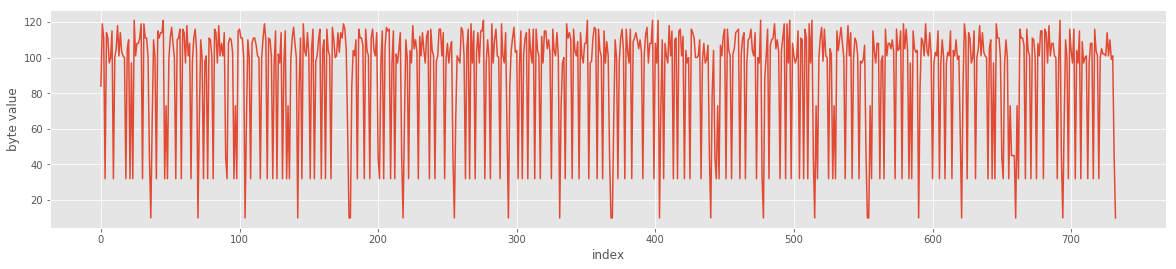

In [322]:
plt.figure(figsize=(20, 4))
plt.plot(np.frombuffer(text_bytes, dtype=np.uint8))
plt.ylabel('byte value')
plt.xlabel('index')
plt.show()

(You can actually see the structure of the text here a little bit!)

### Manipulating text files as images

Because text files are just bytes, we can re-use those bytes in creative ways. In this section of the notebook, we're going to treat those bytes as image data.

Before continuing, install Pillow. Type the following at the command line (making sure that you're invoking the same `python` that your Jupyter Notebook is using):

    pip install Pillow
    
Or if you're using Anaconda:

    conda install pillow
    
Our method for converting text into images:

* Load the text as bytes
* Use each sequence of three bytes as the red, green, and blue pixel values
* Pick an arbitrary width for the image (and pad the data so that it fits that width)

In [73]:
from PIL import Image, ImageOps, ImageFilter

Byte strings are one-dimensional, but images are two-dimensional. So we need to pick arbitrary dimensions for the image. I decided to make it 20 pixels wide, but you should pick a different value based on your own text and needs.

In [298]:
width = 20 # arbitrary, adjust to taste
padded_text_bytes = text_bytes + (b' ' * width * 3)
height = int((len(padded_text_bytes) / 3) / width)

Pillow's `Image.frombytes` function takes a byte sequence and makes an image with it, using the provided dimensions.

In [299]:
text_img = Image.frombytes('RGB', (width, height), padded_text_bytes)

Here's what it looks like:

In [300]:
text_img

This is a bit small, so we can resize it:

In [301]:
def show_scaled(img, scale=8):
    return img.resize((img.width*scale, img.height*scale))

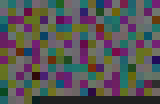

In [302]:
show_scaled(text_img)

Now that we have an image, Pillow can save it in any format we'd like—here's how to save it as a PNG:

In [165]:
text_img.save("text_img.png")

Now you could manipulate the image in a separate image editing program, then load it again like so:

In [303]:
loaded = Image.open("text_img.png")

Since we haven't changed the data at all, we should be able to recover the text from the image perfectly:

In [304]:
img_bytes = loaded.tobytes()

In [305]:
print(img_bytes)

b'Two roads diverged in a yellow wood,\nAnd sorry I could not travel both\nAnd be one traveler, long I stood\nAnd looked down one as far as I could\nTo where it bent in the undergrowth;\n\nThen took the other, as just as fair,\nAnd having perhaps the better claim,\nBecause it was grassy and wanted wear;\nThough as for that the passing there\nHad worn them really about the same,\n\nAnd both that morning equally lay\nIn leaves no step had trodden black.\nOh, I kept the first for another day!\nYet knowing how way leads on to way,\nI doubted if I should ever come back.\n\nI shall be telling this with a sigh\nSomewhere ages and ages hence:\nTwo roads diverged in a wood, and I---\nI took the one less travelled by,\nAnd that has made all the difference.\n                                               '


Nice! Now we can play around a bit: modify the image, then decode it as text. And see what happened! For functions you can use with Pillow images, see [Image reference](https://pillow.readthedocs.io/en/latest/reference/Image.html), [ImageFilter reference](https://pillow.readthedocs.io/en/latest/reference/ImageFilter.html), [ImageOps reference](https://pillow.readthedocs.io/en/latest/reference/ImageOps.html). (Or, you can open the image in an image editor, save it again, then open it with the `Image.open(...)` cell above!)

First, a little Gaussian blur:

In [306]:
gaussian = loaded.filter(ImageFilter.GaussianBlur(0.15))

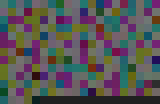

In [307]:
gaussian.resize((loaded.width*8, loaded.height*8))

In [308]:
print(gaussian.tobytes().decode('utf8', 'ignore'))

To#whbre it#benq in the&undergrowth;
Somewhere ades&akd"ages#hence:Two roads&divergdd#in a#wold,#and#I---
And teat#has#madd#ali!qhe difference.
                                               


Flipping the image vertically:

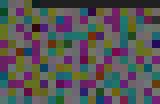

In [309]:
flipped = ImageOps.flip(loaded)
flipped.resize((loaded.width*8, loaded.height*8))

In [173]:
print(flipped.tobytes().decode('utf8', 'ignore'))

 difference.
                                               
I took the one less travelled by,
And that has made all the ages and ages hence:
Two roads diverged in a wood, and I---er come back.

I shall be telling this with a sigh
Somewhereet knowing how way leads on to way,
I doubted if I should evp had trodden black.
Oh, I kept the first for another day!
Yhe same,

And both that morning equally lay
In leaves no steh as for that the passing there
Had worn them really about te better claim,
Because it was grassy and wanted wear;
Thoug
Then took the other, as just as fair,
And having perhaps th one as far as I could
To where it bent in the undergrowth;
ravel both
And be one traveler, long I stood
And looked downTwo roads diverged in a yellow wood,
And sorry I could not t


Rotate 90 degrees:

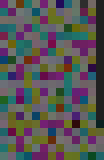

In [310]:
rotated = loaded.rotate(90, expand=True)
rotated.resize((rotated.width*8, rotated.height*8))

In [311]:
print(rotated.tobytes().decode('utf8', 'ignore'))

t townh;
 thougt tste!
Y evere---the    nod dowtaps
Thbouno dayuldewhd Ill    uldokergrerhar;y aes er shoSom ane a    co londeg p wealleavoth I gh
od,mad   y IAnde uvinted ren l an if si woas    orrod
 th hawanhemy
Ifortedh an at h   d ssto inAndnd n t last oubwitd itha   
An I entr,
y aworllyfirI dis rgend    od,ongt bfaiassad quahe y,
 thive,
A    wo, le ias  gre
Hg et t waings d by   lowlerherst washerninkep toelloadled   yelaveo w juit g tmor I  one to rvel    a  trd
T asse sinat Oh,adsl b
Twtra    inoneouler,caupas thk.
 lehalce:ss    gedbe I coth
Behe othlacwayI shen le   vernd as he im,t td bn bow .

es one
   dih
Aar k tclatha
Anddeg hack aghe ce.adsbots ftooer or e,
trowine bandk tren roel e aen etts fsamad knocomes tooffeTworav on
The bh ahe p het er  ag
I  di


Posterize (i.e., reduce the number of bits per color component):

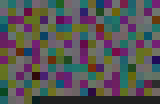

In [312]:
poster = ImageOps.posterize(loaded, 7)
poster.resize((loaded.width*8, loaded.height*8))

In [313]:
print(poster.tobytes().decode('utf8', 'ignore'))

Tvn rn`dr dhvdrfdd hn ` xdllnv vnnd,
@nd rnrrx H bntld nnt tr`vdl bnth
@nd bd nnd tr`vdldr, lnnf H rtnnd
@nd lnnjdd dnvn nnd `r f`r `r H bntld
Tn vhdrd ht bdnt hn thd tnddrfrnvth:

Thdn tnnj thd nthdr, `r jtrt `r f`hr,
@nd h`vhnf pdrh`pr thd bdttdr bl`hl,
Bdb`trd ht v`r fr`rrx `nd v`ntdd vd`r:
Thntfh `r fnr th`t thd p`rrhnf thdrd
H`d vnrn thdl rd`llx `bntt thd r`ld,

@nd bnth th`t lnrnhnf dpt`llx l`x
Hn ld`vdr nn rtdp h`d trndddn bl`bj.
Nh, H jdpt thd fhrrt fnr `nnthdr d`x 
Xdt jnnvhnf hnv v`x ld`dr nn tn v`x,
H dntbtdd hf H rhntld dvdr bnld b`bj.

H rh`ll bd tdllhnf thhr vhth ` rhfh
Rnldvhdrd `fdr `nd `fdr hdnbd:
Tvn rn`dr dhvdrfdd hn ` vnnd, `nd H,,,
H tnnj thd nnd ldrr tr`vdlldd bx,
@nd th`t h`r l`dd `ll thd dhffdrdnbd.
                                               


Resize the image:

In [181]:
resized = loaded.resize((loaded.width*4, loaded.height*4), resample=Image.NEAREST)

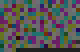

In [182]:
resized

In [183]:
print(resized.tobytes().decode('utf8', 'ignore'))

TwoTwoTwoTwo ro ro ro roadsadsadsads di di di diververververgedgedgedged in in in in a  a  a  a yelyelyelyellowlowlowlow wo wo wo wood,od,od,od,
An
An
An
And sd sd sd sorrorrorrorry Iy Iy Iy I co co co coulduldulduld no no no not tt tt tt tTwoTwoTwoTwo ro ro ro roadsadsadsads di di di diververververgedgedgedged in in in in a  a  a  a yelyelyelyellowlowlowlow wo wo wo wood,od,od,od,
An
An
An
And sd sd sd sorrorrorrorry Iy Iy Iy I co co co coulduldulduld no no no not tt tt tt tTwoTwoTwoTwo ro ro ro roadsadsadsads di di di diververververgedgedgedged in in in in a  a  a  a yelyelyelyellowlowlowlow wo wo wo wood,od,od,od,
An
An
An
And sd sd sd sorrorrorrorry Iy Iy Iy I co co co coulduldulduld no no no not tt tt tt tTwoTwoTwoTwo ro ro ro roadsadsadsads di di di diververververgedgedgedged in in in in a  a  a  a yelyelyelyellowlowlowlow wo wo wo wood,od,od,od,
An
An
An
And sd sd sd sorrorrorrorry Iy Iy Iy I co co co coulduldulduld no no no not tt tt tt travravravravel el el el botbotbotboth
Ah

## Text as audio

Bonus!

In [317]:
from IPython.display import Audio

In [318]:
import math

In [319]:
Audio([val/255 for val in text_bytes[:20000]], rate=2000)